## import amd setup

In [ ]:
/home/mlehner/pyDR/tests/02_methyl_test_1ubq_leu_4us_pickle_ct.ipynb

In [1]:
import numpy as np
import pyDR as DR
from pyDR.Project import Project
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pickle
import os
from copy import deepcopy

In [2]:
ile_resn = [3, 13, 23, 30, 36, 44, 61]
#test_list = ["test_001", "test_002", "test_003", "test_004", "test_007", "test_008", "test_009", "test_010", "test_011"]
test_list =["test_001", "test_002", "test_011", "test_003", "test_009", "test_010", "test_012"]
color_list = ["lightcoral","firebrick","maroon","darkgreen","cornflowerblue","royalblue","gold"]

In [3]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", color_list)

In [4]:
data = []
for test in test_list:
    out=pickle.load(open("./out_figures/ile/"+test+"/out4.p", 'rb'))
    data.append(out)

In [5]:
data[0][-1]["ct_prod"].shape

(42, 400001)

In [6]:
tf=200000
t=np.arange(tf>>1)*.005

## tot plots

In [7]:
def creat_split_plots(out, save=None, show=True):    
    titles=[['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl lib.','Methyl hop.',r'$\chi_2$ lib.',r'$\chi_2$ hop.',
                r'$\chi_1$ lib.',r'$\chi_1$ hop.',r'C$\alpha$-C$\beta$ motion','Total']]
    fig=plt.figure('Methyl Dynamics')
    fig.clear()
    fig.set_size_inches([10.27,  9.03])
    ax=[]
    ax.append([fig.add_subplot(5,3,k+1) for k in range(0,15,3)])
    ax.append([fig.add_subplot(5,3,k+1) for k in range(1,15,3)])
    ax.append([fig.add_subplot(5,6,k+1) for k in [4,5,10,11,16,17,22]])
    ax[-1].append(fig.add_subplot(5,3,15))

    for a0,t0 in zip(ax,titles):
        for a, title in zip(a0,t0):
            a.set_title(title)

    i = 0
    j = 0
    for inc,ax0 in zip(range(3),ax):
        i += 1 
        out_include = out[inc]       
        for ct,a in zip(out_include['ct_finF'],ax0):
            j += 1
            try:
                a.cla()
                a.plot(t,ct.mean(0)[:tf>>1])
                a.set_ylim([0,1.05])
                S2=ct.mean(0)[tf>>2:tf>>1].mean()
                b=np.argwhere(ct.mean(0)-S2<0)[0,0]
                #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
                tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
                fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
                S2,tc=least_squares(fun,[S2,tc0]).x
                a.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
                a.set_xlim([0,50*tc])
                #a.set_xlim([0,np.min([10*tc, out['t'][:tf>>1]])])
                a.set_title(f"{i}-{j}")
            except:
                pass
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct'].mean(0)[:tf>>1])
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct_prod'].mean(0)[:tf>>1])
        ax0[-1].set_ylim([0,.5])
        
    fig.set_size_inches([180/25.4,220/25.4])

    if save:
        plt.savefig("./out_figures/ile/"+save+"/split_plot.pdf")

    if show:
        plt.show()
    else:
        plt.close()

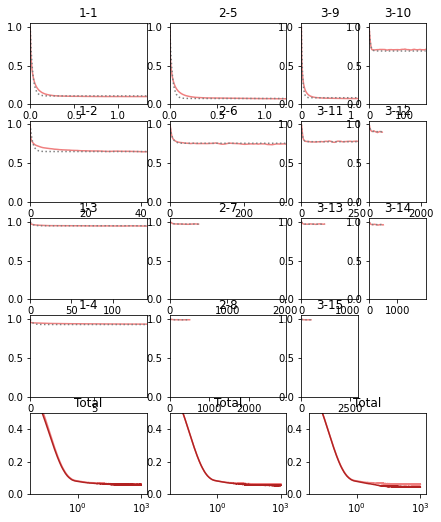

In [8]:
creat_split_plots(data[0])

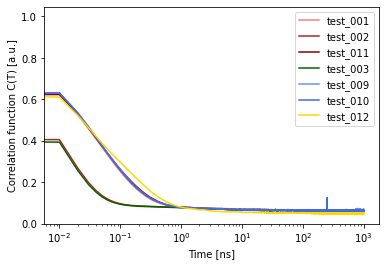

In [9]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
#for out in [x[-1] for x in data]:
#        plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1],color='grey',linestyle=':')
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Total Correlation Function")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot00.png")

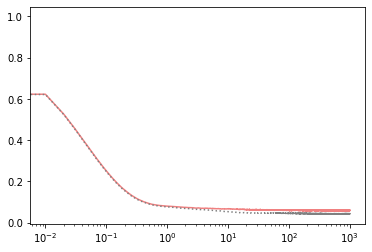

In [10]:
out = data[0][-1]
plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1],color='grey',linestyle=':')

0.02294764628564957
0.005979641273097539


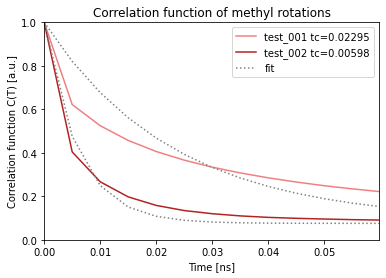

In [31]:
tc_list = []
for out in [x[-1] for x in data[:2]]:    
    ct = out['ct_finF'][0]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data[:2]]:
    ct = out['ct_finF'][0]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
    print(tc)
    tc_list.append(tc)
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = [l+f" tc="+"{:.4}".format(tc) for l, tc in zip(test_list[:2],tc_list)] + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Correlation function of methyl rotations")
plt.legend(legend_list)


3.174283991315025
3.119809578532161


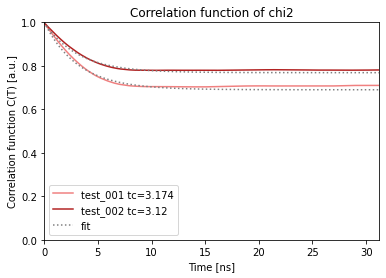

In [32]:
tc_list = []
for out in [x[-1] for x in data[:2]]:    
    ct = out['ct_finF'][1]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data[:2]]:
    ct = out['ct_finF'][1]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
    print(tc)
    tc_list.append(tc)
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = [l+f" tc="+"{:.4}".format(tc) for l, tc in zip(test_list[:2],tc_list)] + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Correlation function of chi2")
plt.legend(legend_list)

5.066699703967702
5.322301258791708


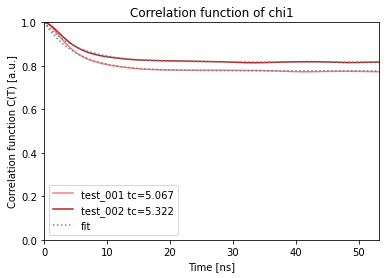

In [33]:
tc_list = []
for out in [x[-1] for x in data[:2]]:    
    ct = out['ct_finF'][2]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data[:2]]:
    ct = out['ct_finF'][2]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
    print(tc)
    tc_list.append(tc)
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = [l+f" tc="+"{:.4}".format(tc) for l, tc in zip(test_list[:2],tc_list)] + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Correlation function of chi1")
plt.legend(legend_list)

43.25971494204533
44.455341264892624


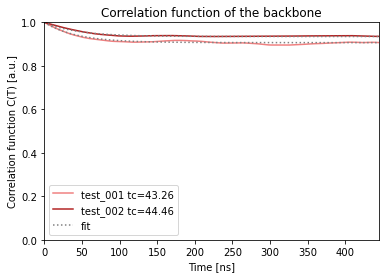

In [34]:
tc_list = []
for out in [x[-1] for x in data[:2]]:    
    ct = out['ct_finF'][3]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data[:2]]:
    ct = out['ct_finF'][3]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
    print(tc)
    tc_list.append(tc)
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = [l+f" tc="+"{:.4}".format(tc) for l, tc in zip(test_list[:2],tc_list)] + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Correlation function of the backbone")
plt.legend(legend_list)

In [44]:
ile_test_list_3 = [x+"_ile3" for x in test_list]
ile_test_list_13 = [x+"_ile13" for x in test_list]
ile_test_list_23 = [x+"_ile23" for x in test_list]
ile_test_list_44 = [x+"_ile44" for x in test_list]

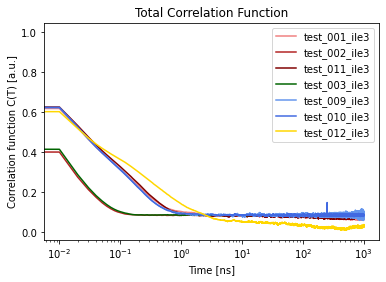

In [17]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
#for out in [x[-1] for x in data]:
#        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend(ile_test_list_3+ile_test_list_44)
plt.savefig("./out_figures/report/plot_ile.png")

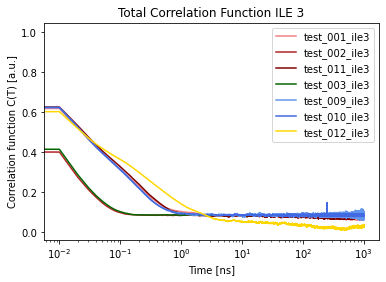

In [57]:
picks=list(range(len(test_list)))
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
#for out in [x[-1] for x in [data[x] for x in picks]]:
#        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function ILE 3")
plt.legend([ile_test_list_3[x] for x in picks]+[ile_test_list_44[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile_3.png")

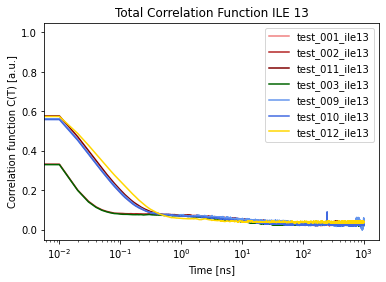

In [56]:
picks=list(range(len(test_list)))
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][6:12].mean(0)[:tf>>1])
#for out in [x[-1] for x in [data[x] for x in picks]]:
#        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function ILE 13")
plt.legend([ile_test_list_13[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile_13.png")

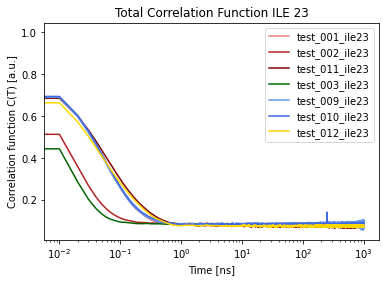

In [55]:
picks=list(range(len(test_list)))
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][12:18].mean(0)[:tf>>1])
#for out in [x[-1] for x in [data[x] for x in picks]]:
#        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function ILE 23")
plt.legend([ile_test_list_23[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile_23.png")

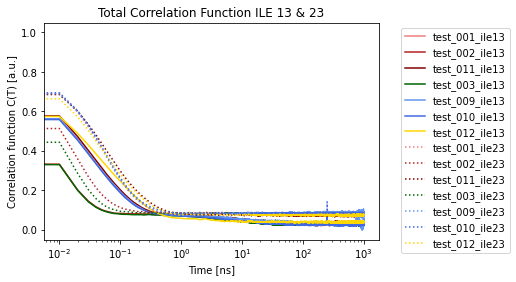

In [54]:
picks=list(range(len(test_list)))
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][6:12].mean(0)[:tf>>1])
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][12:18].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function ILE 13 & 23")
plt.legend([ile_test_list_13[x] for x in picks]+[ile_test_list_23[x] for x in picks], bbox_to_anchor=(1.05, 1))
plt.savefig("./out_figures/report/plot_ile_13and23.png")

# Plot of single residues

## functions and definitions

In [7]:
data[0][-1]['ct_finF'].shape

(7, 42, 400001)

In [32]:
motion_labels = ["Methyl", "Chi2", "Chi1", "Backbone"]
residue_labels_slices_dict = {"ILE3": (0,6), "ILE13": (6,12), "ILE23": (12,18), "ILE30": (18,24), "ILE36": (24,30), "ILE44": (30,36), "ILE61": (36,42)}

In [46]:
def plot_ct_finF(data, test_selector, residue_selector, motion_selector):
    try:
        tc_list = []
        S2_list = []
        residue_slice = slice(residue_labels_slices_dict[residue_selector][0], residue_labels_slices_dict[residue_selector][1])
        for out in [x[-1] for x in data[test_selector]]:
            ct = out['ct_finF'][motion_selector]
            plt.plot(t,ct[residue_slice].mean(0)[:tf>>1])
        for out in [x[-1] for x in data[test_selector]]:
            ct = out['ct_finF'][motion_selector]
            ct=ct[residue_slice]
            S2=ct.mean(0)[tf>>2:tf>>1].mean()
            b=np.argwhere(ct.mean(0)-S2<0)[0,0]
            tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
            fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
            S2,tc=least_squares(fun,[S2,tc0]).x
            tc_list.append(tc)
            S2_list.append(S2)
            plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
        plt.xlim([0,10*tc])
        plt.ylim([0,1])
        legend_list = [l+f" tc={tc:.3} S2={S2:.3}" for l, tc, s2 in zip(test_list[test_selector],tc_list, S2_list)] + ["fit"]
        plt.xlabel("Time [ns]")
        plt.ylabel("Correlation function C(T) [a.u.]")
        plt.title(f"Correlation function of {motion_labels[motion_selector]} rotation of {residue_selector}")
        plt.legend(legend_list)
        #plt.savefig(f"./out_figures/report/plot_ct_finF_{residue_selector}_{motion_labels[motion_selector]}.png")
        plt.show()
    except:
        pass
        #print(e)

In [48]:
residue_labels_slices_dict.keys()

dict_keys(['ILE3', 'ILE13', 'ILE23', 'ILE30', 'ILE36', 'ILE44', 'ILE61'])

## ILE 3

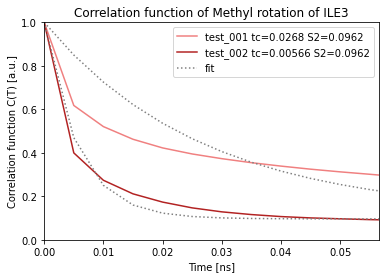

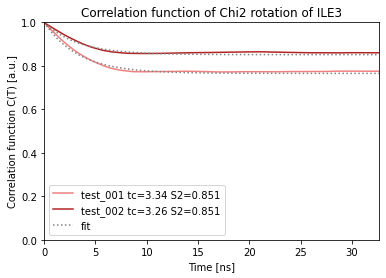

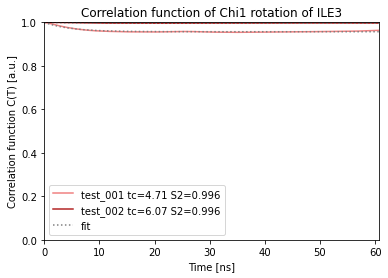

/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


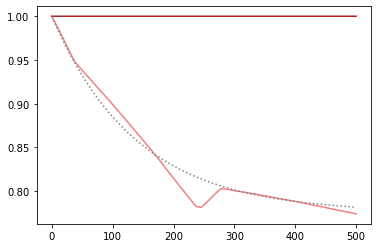

In [49]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE3", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE3", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE3", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE3", motion_selector=3)

## ILE 13

/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


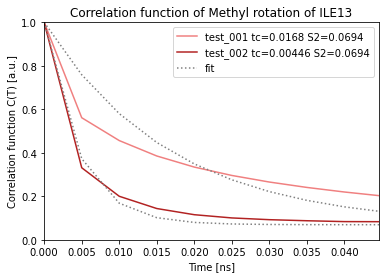

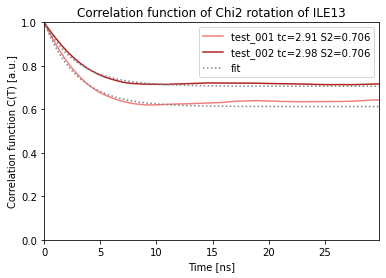

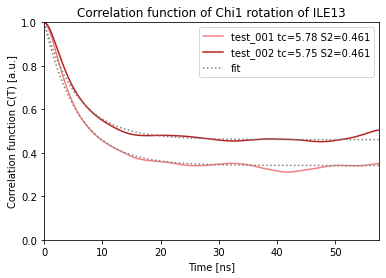

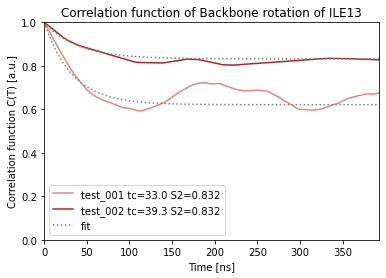

In [38]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE13", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE13", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE13", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE13", motion_selector=3)

## ILE 23

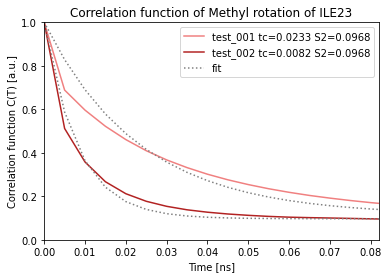

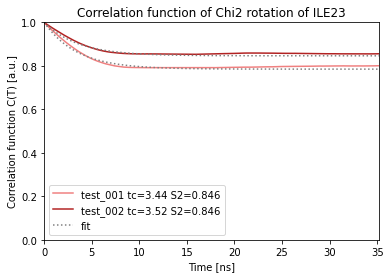

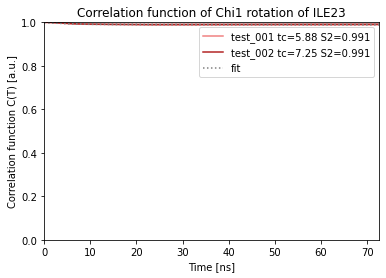

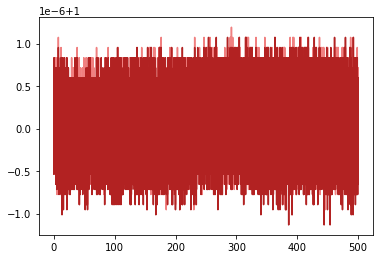

In [50]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE23", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE23", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE23", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE23", motion_selector=3)

## ILE 30

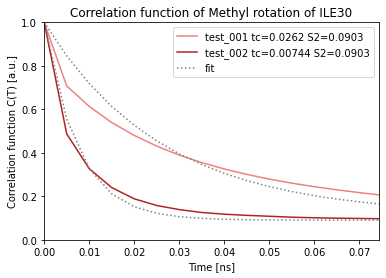

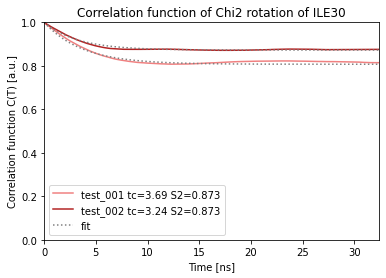

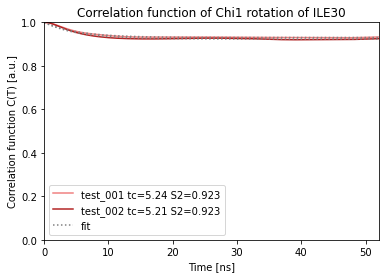

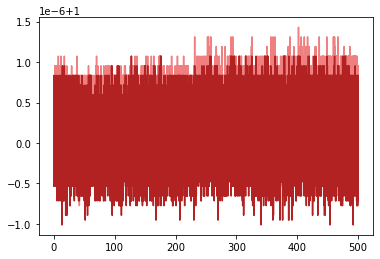

In [51]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE30", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE30", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE30", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE30", motion_selector=3)

## ILE 36

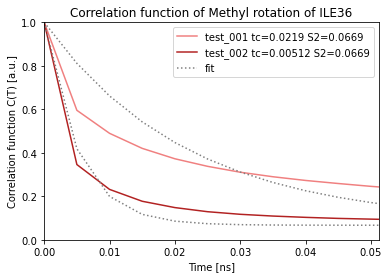

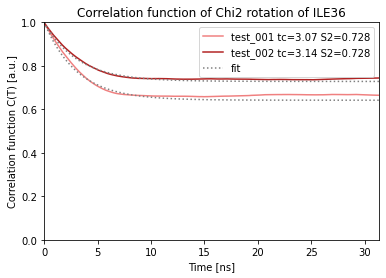

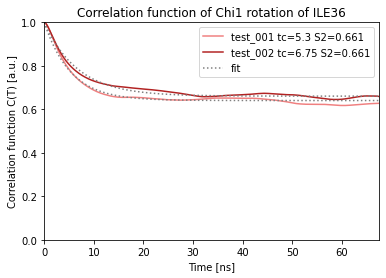

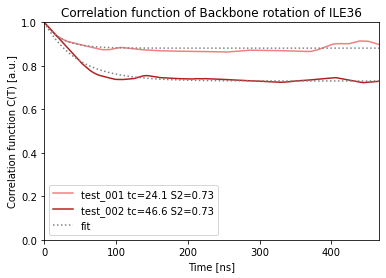

In [52]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE36", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE36", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE36", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE36", motion_selector=3)

##  ILE 44

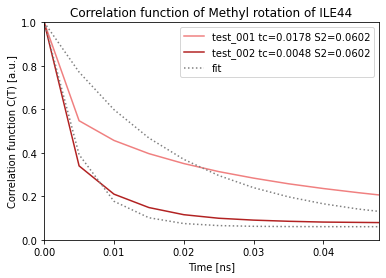

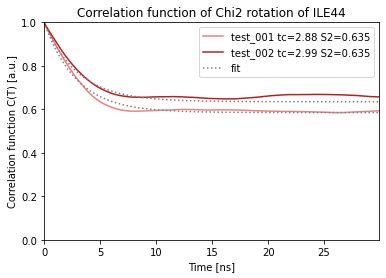

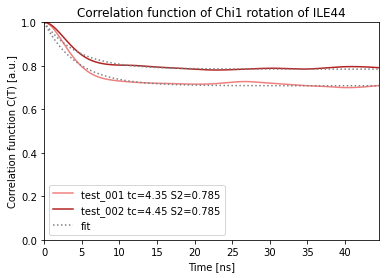

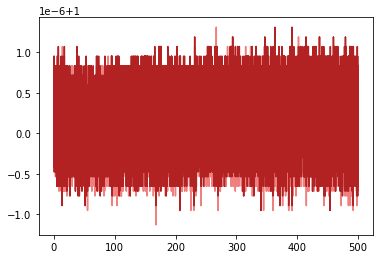

In [53]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE44", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE44", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE44", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE44", motion_selector=3)

## ILE 61

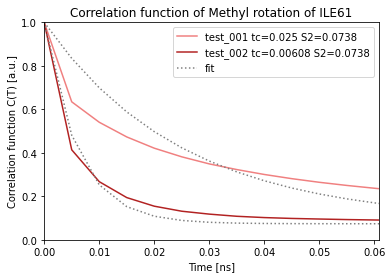

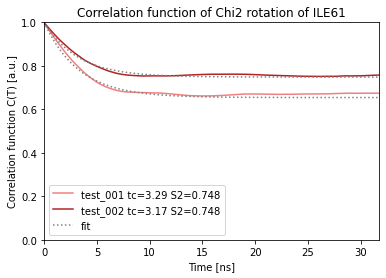

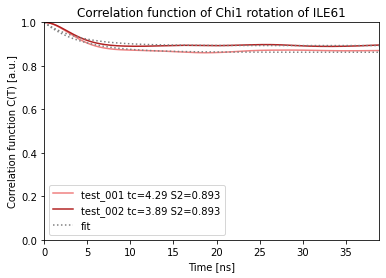

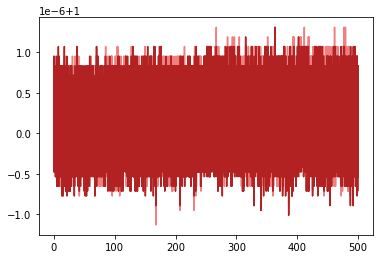

In [47]:
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE61", motion_selector=0)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE61", motion_selector=1)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE61", motion_selector=2)
plot_ct_finF(data=data, test_selector=slice(0,2), residue_selector="ILE61", motion_selector=3)